In [11]:
import numpy as np

from xgboost import XGBClassifier
from scipy.signal import medfilt

from automated_scoring.config import cfg
from automated_scoring.io import load_dataset
from automated_scoring.features import DataFrameFeatureExtractor
from automated_scoring.classification import (
    k_fold_predict,
    optimize_smoothing,
    optimize_decision_thresholds,
)
from automated_scoring.utils import ensure_generator

from helpers import subsample_train

cfg.key_keypoints = "keypoints"
cfg.key_timestamp = "timestamps"

cfg.trajectory_keys = (
    "keypoints",
    "timestamps",
)

In [6]:
dataset_train = load_dataset("mice_train", directory="datasets/CALMS21/train", target="dyads")
dataset_test = load_dataset("mice_test", directory="datasets/CALMS21/test", target="dyads")

Loading categories (attack, investigation, mount, none) from observations file, specify categories argument if incomplete.
Loading categories (attack, investigation, mount, none) from observations file, specify categories argument if incomplete.


In [7]:
extractor = DataFrameFeatureExtractor(cache_directory="feature_cache_mice").read_yaml("config_file.yaml")

iterations:   0%|          | 0/2 [00:00<?, ?it/s]

scoring combinations:   0%|          | 0/9 [00:00<?, ?it/s]

scoring combinations:   0%|          | 0/9 [00:00<?, ?it/s]

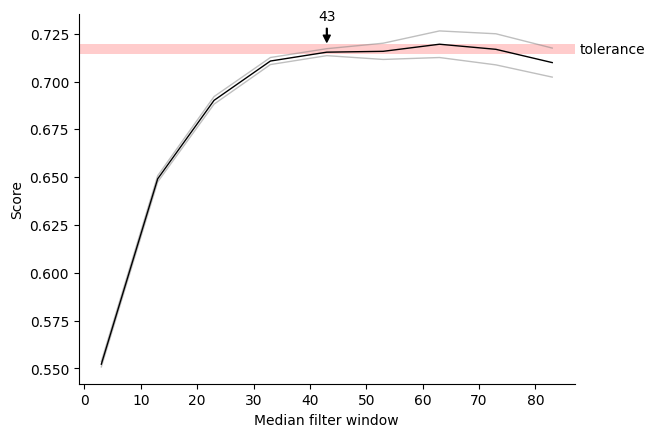

{'median_filter_window': 43.0}

In [10]:
best_parameters = optimize_smoothing(
    dataset_train,
    extractor,
    XGBClassifier(n_estimators=1000),
    lambda probabilities, parameters: medfilt(probabilities, parameters["median_filter_window"]),
    smoothing_parameters_grid={"median_filter_window": np.arange(3, 91, 2)},
    num_iterations=20,
    show_progress=True,
    k=5,
    exclude=[("intruder", "resident")],
    sampling_func=subsample_train,
    show_k_fold_progress=False,
    tolerance=0.005,
    random_state=ensure_generator(1),
)

best_parameters  # 47

iterations:   0%|          | 0/20 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

thresholding categories:   0%|          | 0/4 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

scoring thresholds:   0%|          | 0/100 [00:00<?, ?it/s]

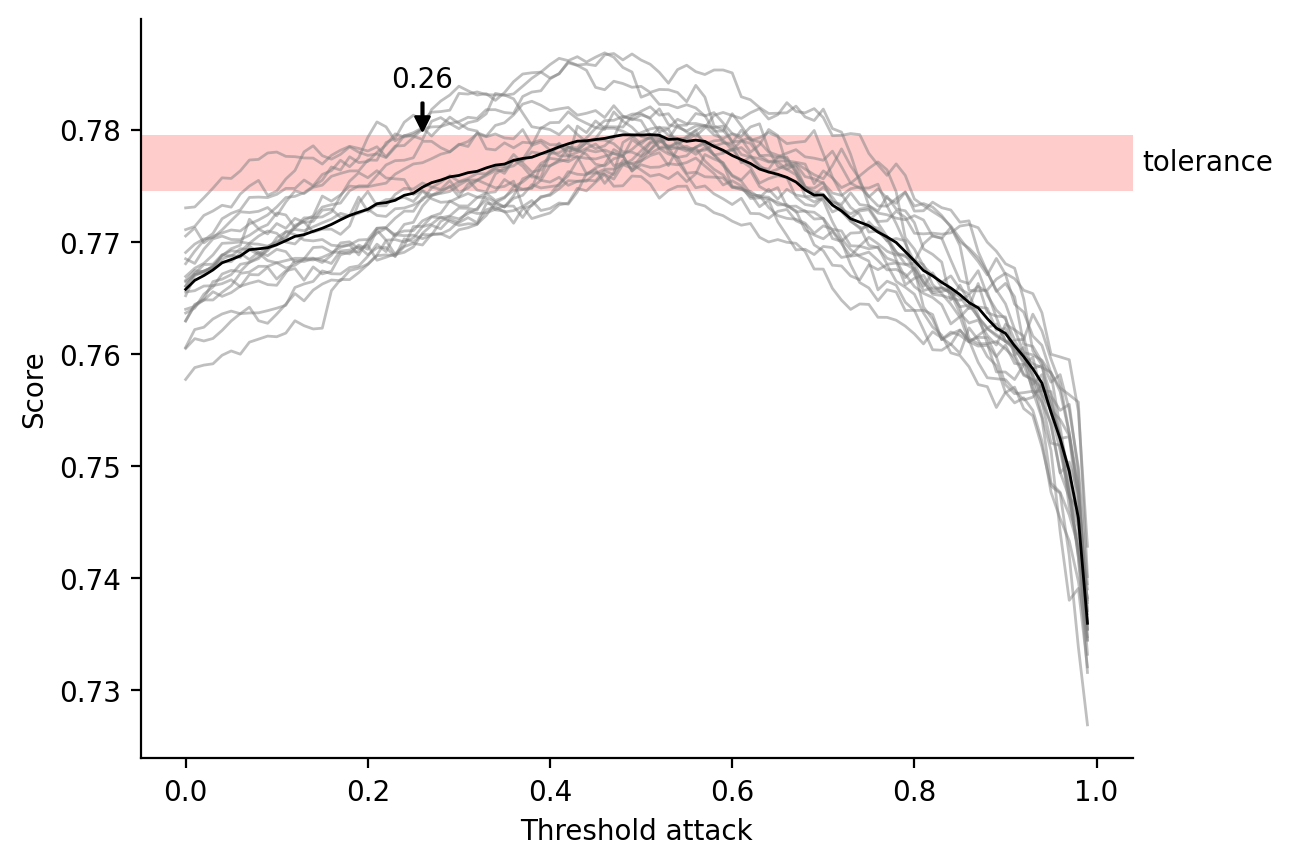

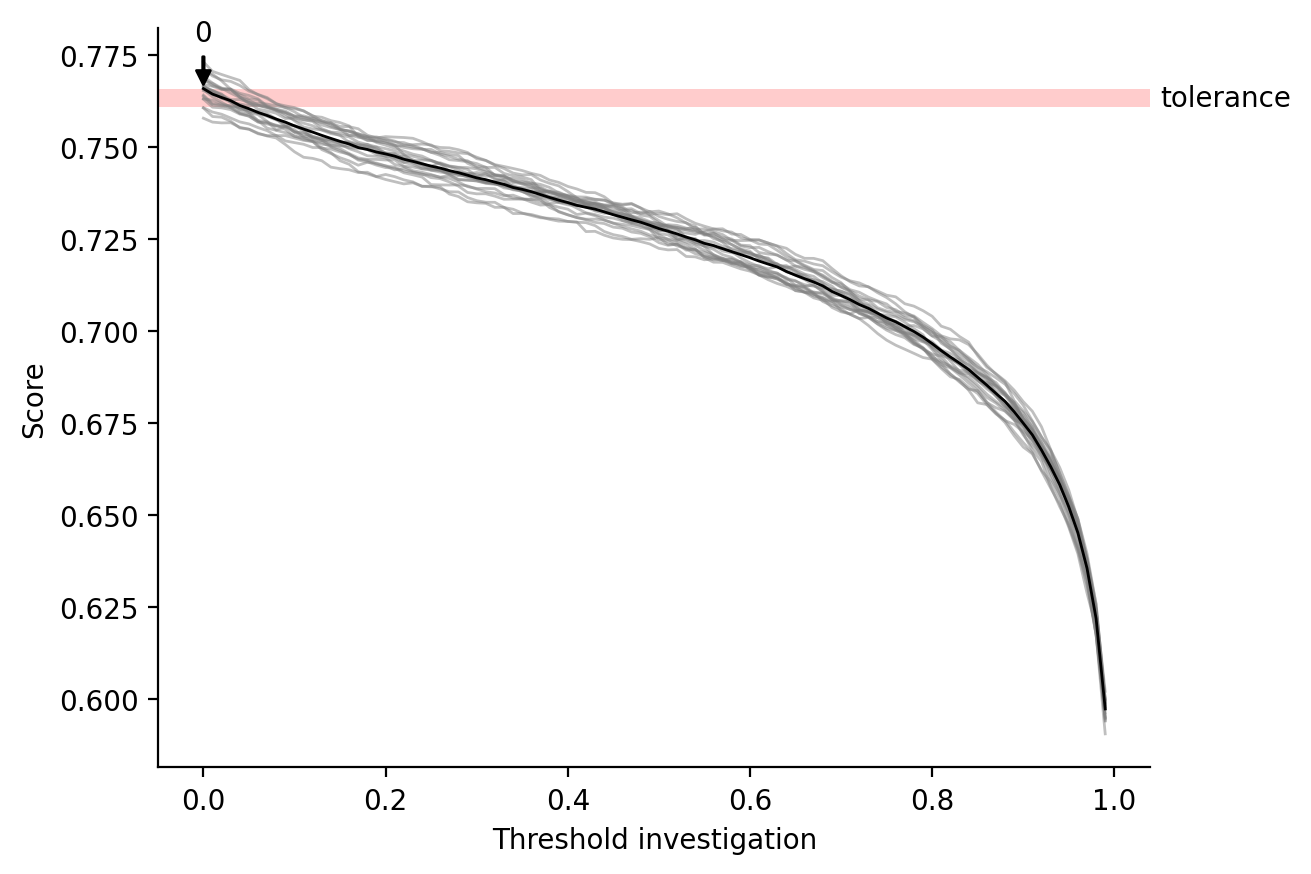

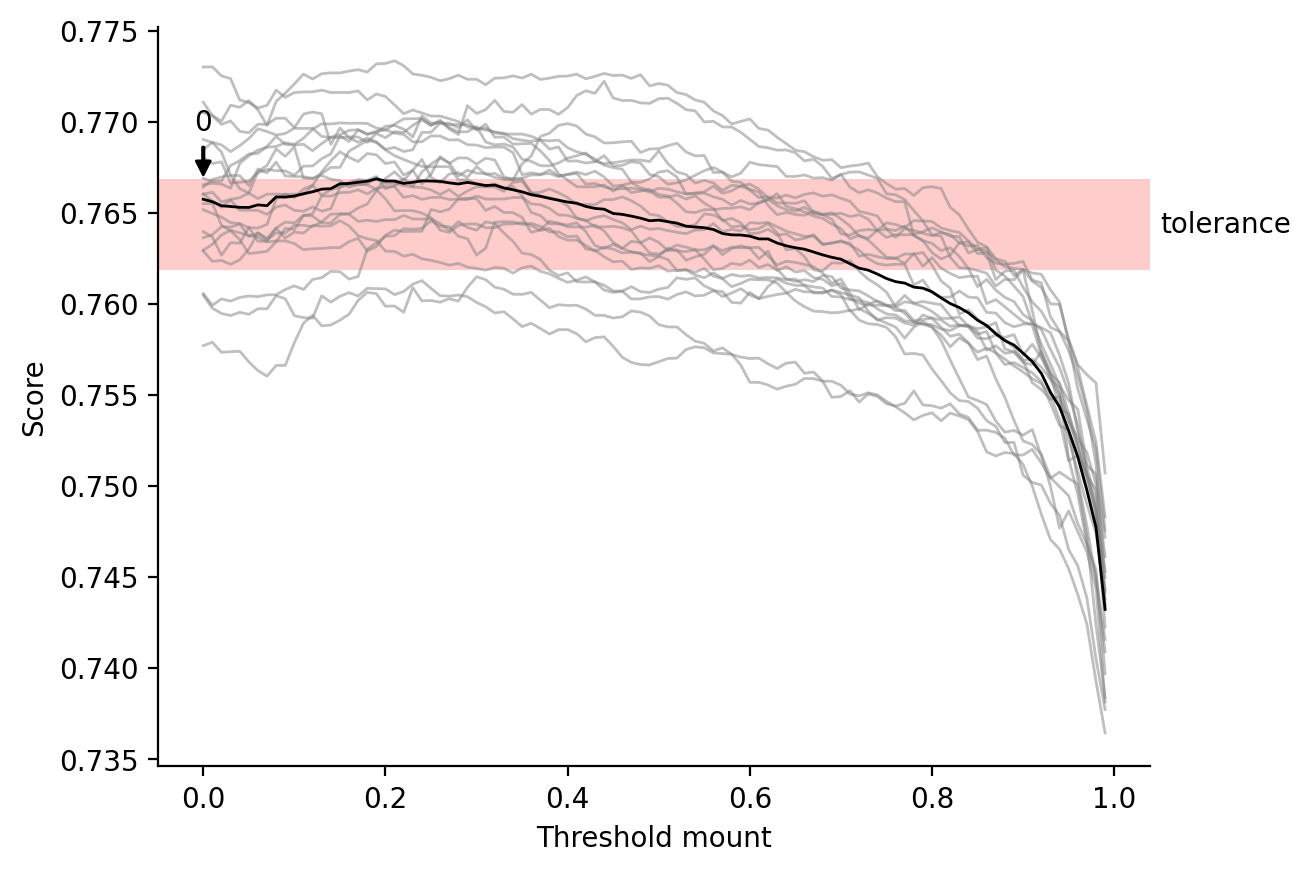

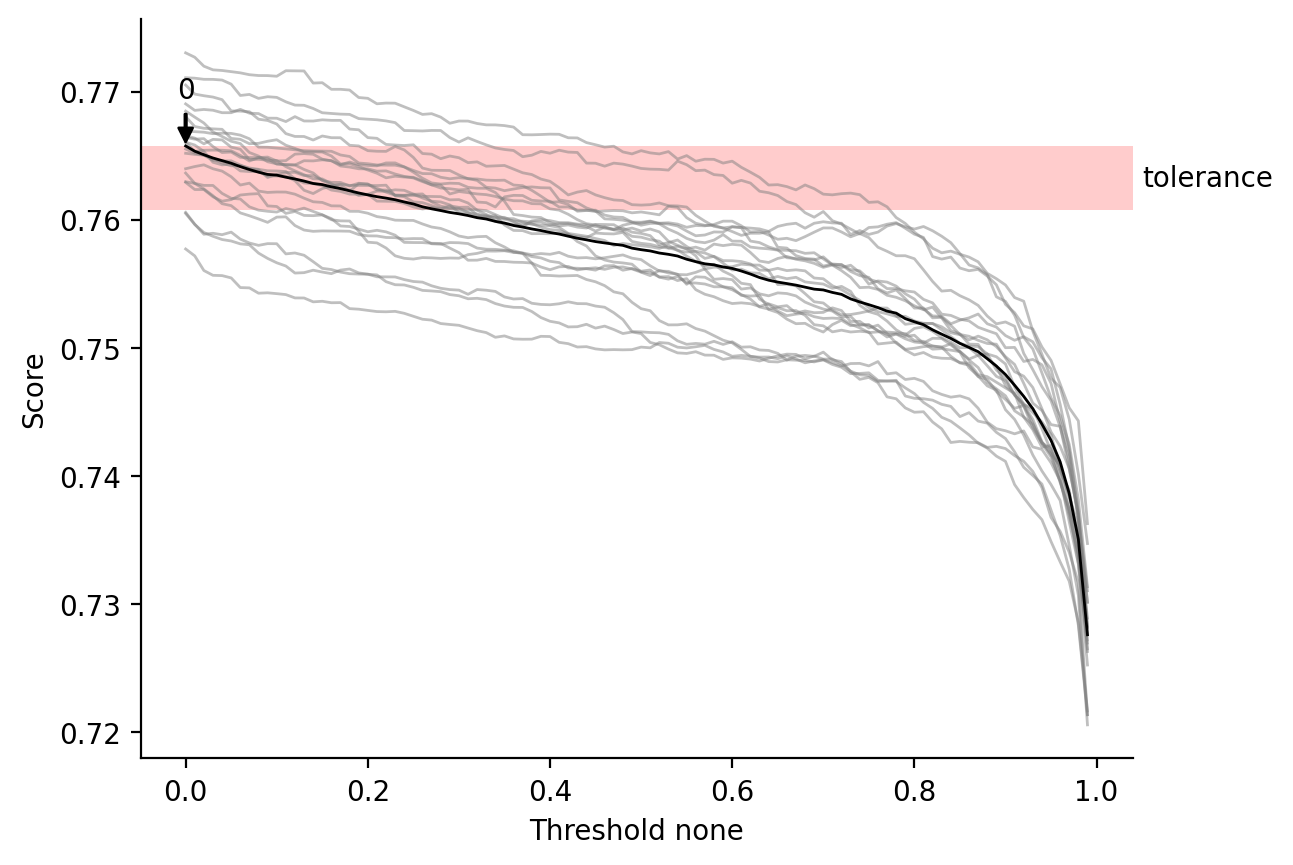

({'threshold_attack': 0.26},
 {'threshold_investigation': 0.0},
 {'threshold_mount': 0.0},
 {'threshold_none': 0.0})

In [7]:
best_thresholds = optimize_decision_thresholds(
    dataset_train,
    extractor,
    XGBClassifier(n_estimators=1000),
    smoothing_func=lambda probabilities: medfilt(probabilities, int(best_parameters["median_filter_window"])),
    num_iterations=20,
    show_progress=True,
    k=5,
    exclude=[("intruder", "resident")],
    sampling_func=subsample_train,
    show_k_fold_progress=False,
    decision_threshold_range=(0.0, 1.0),
    decision_threshold_step=0.01,
    tolerance=0.005,
    plot_results=True,
    random_state=ensure_generator(1),
)

best_thresholds

In [11]:
k_fold_result = k_fold_predict(
    dataset_train,
    extractor,
    XGBClassifier(n_estimators=1000, verbosity=1),
    k=5,
    exclude=[("intruder", "resident")],
    random_state=ensure_generator(1),
    sampling_func=subsample_train,
    show_progress=True,
)

k-fold predict:   0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
k_fold_result.classification_results.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69])

In [13]:
# category_labels = ['att', 'inv', 'mnt', 'none']

In [14]:
# 16 seems systematically shifted, maybe 41,

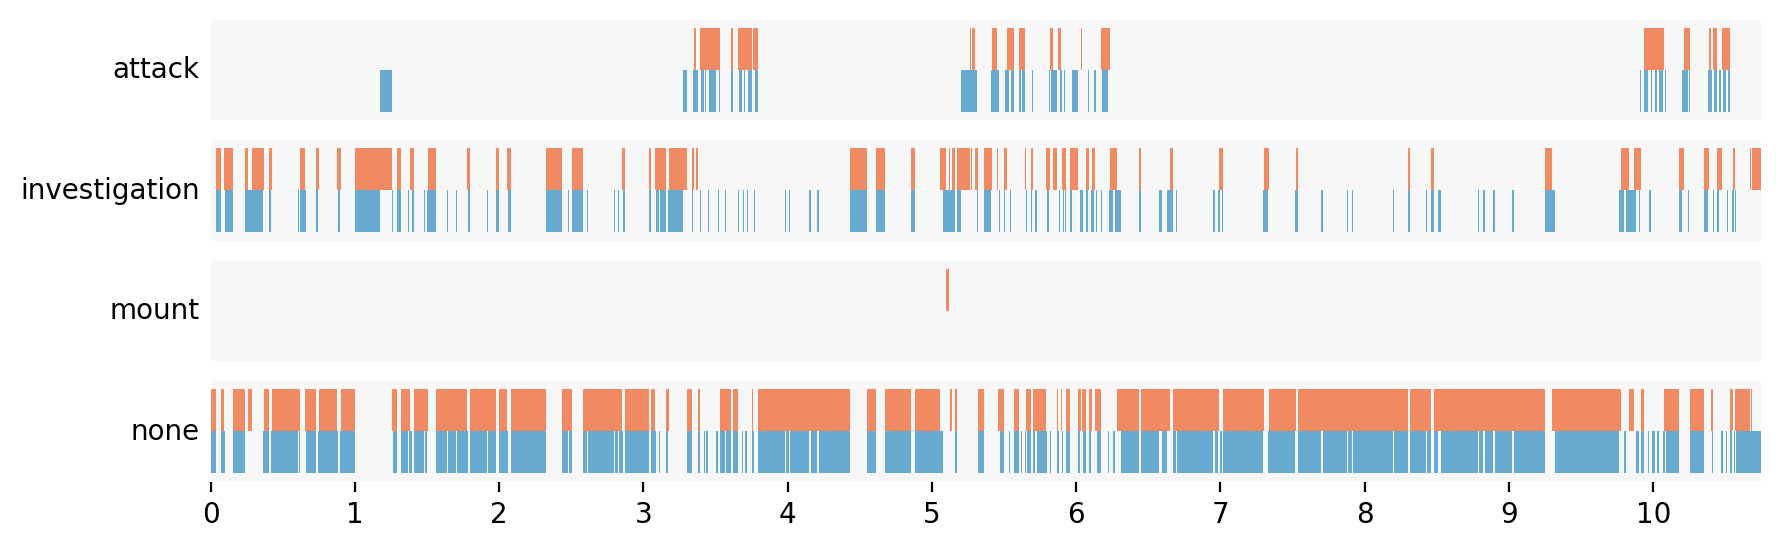

In [52]:
classification_results = k_fold_result.classification_results[1].classification_results[('resident', 'intruder')]

plot_classification_timeline(
    classification_results.predictions,
    classification_results.categories,
    annotations=classification_results.annotations,
    timestamps=classification_results.timestamps,
    interval=(-np.inf, np.inf),
    # y_proba=classification_results.y_proba,
    # y_proba_smoothed=classification_results.y_proba_smoothed,
    x_tick_step=(60 * 30),
    x_tick_conversion=lambda ticks: [int(tick / (30 * 60)) for tick in ticks],
)

In [53]:
# f1_timestamp_raw = k_fold_result.f1_score("timestamp", encode_func=dataset_train.encode)
# f1_annotation_raw = k_fold_result.f1_score("annotation", encode_func=dataset_train.encode)
# f1_prediction_raw = k_fold_result.f1_score("prediction", encode_func=dataset_train.encode)

# k_fold_result = k_fold_result.smooth([lambda probabilities: medfilt(probabilities, 47)])

# f1_timestamp_smooth = k_fold_result.f1_score("timestamp", encode_func=dataset_train.encode)
# f1_annotation_smooth = k_fold_result.f1_score("annotation", encode_func=dataset_train.encode)
# f1_prediction_smooth = k_fold_result.f1_score("prediction", encode_func=dataset_train.encode)

# k_fold_result = k_fold_result.threshold([0.5, 0, 0, 0])

# f1_timestamp_thresh = k_fold_result.f1_score("timestamp", encode_func=dataset_train.encode)
# f1_annotation_thresh = k_fold_result.f1_score("annotation", encode_func=dataset_train.encode)
# f1_prediction_thresh = k_fold_result.f1_score("prediction", encode_func=dataset_train.encode)

In [54]:
# plt.plot(np.arange(4), f1_timestamp_raw, "_")
# plt.plot(np.arange(4) + 0.25, f1_timestamp_smooth, "_")
# plt.plot(np.arange(4) + 0.5, f1_timestamp_thresh, "_")

In [55]:
# plt.plot(np.arange(4), f1_annotation_raw, "_")
# plt.plot(np.arange(4) + 0.25, f1_annotation_smooth, "_")
# plt.plot(np.arange(4) + 0.5, f1_annotation_thresh, "_")

In [56]:
# plt.plot(np.arange(4), f1_prediction_raw, "_")
# plt.plot(np.arange(4) + 0.25, f1_prediction_smooth, "_")
# plt.plot(np.arange(4) + 0.5, f1_prediction_thresh, "_")